In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


### Target dist in training data

In [4]:
train.target.value_counts()/len(train)*100

1.0    64.0
0.0    36.0
Name: target, dtype: float64

In [5]:
## Feature columns stats overview

In [6]:
f_cols = [col for col in train.columns if col not in ["target", "id"]]

In [43]:
test.shape

(19750, 301)

In [41]:
train[f_cols].shape

(250, 300)

<AxesSubplot:>

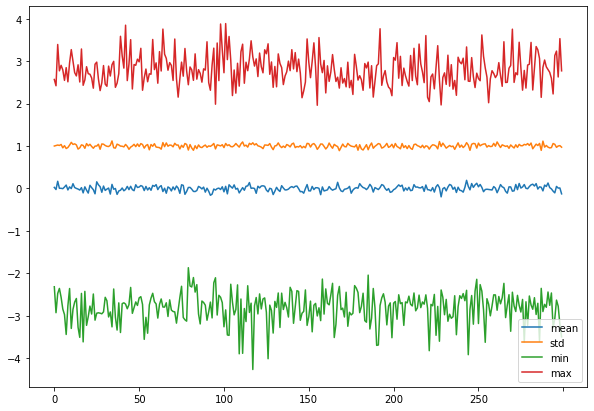

In [7]:
train[f_cols].describe().T[["mean", "std", "min", "max"]].plot(figsize=(10,7))

In [27]:
train[f_cols].min().min(), train[f_cols].max().max()

(-4.27, 3.885)

In [53]:
corr_df = train[f_cols].corr().abs()

# Next to lines are inspired by https://stackoverflow.com/a/55083854
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().T.sort_values(ascending=False).dropna()

/var/folders/bx/2b_70g054qg3qt5jhnw30xv40000gn/T/ipykernel_87758/571869777.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool))


In [54]:
corr_df.max(), corr_df.min(), corr_df.mean(), corr_df.median()

(0.259315271998223,
 2.7016424065714267e-07,
 0.050669687664812044,
 0.04297269089188064)

Stats overview


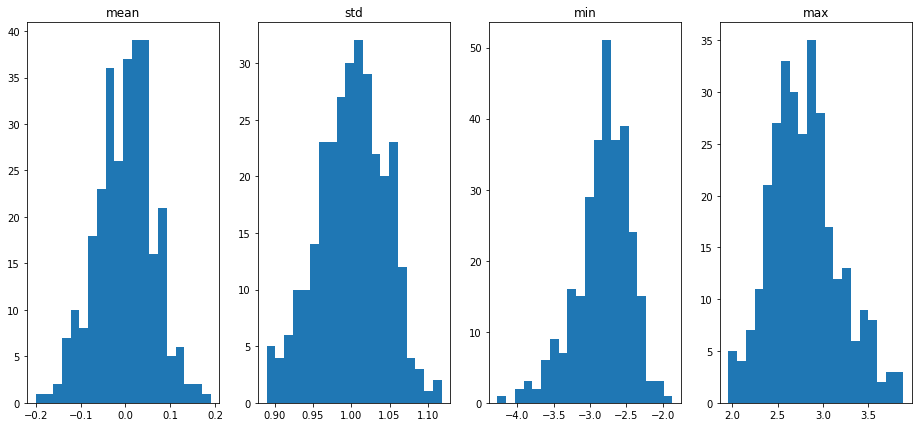

In [8]:
print('Stats overview')
plt.figure(figsize=(20,7))
for i, col in enumerate(["mean", "std", "min", "max"]):
    plt.subplot(1, 5, i + 1)
    plt.hist(train.loc[train.l][f_cols].describe().T[col], 20) 
    plt.title(col)

## Feature plots

Frequency overviews


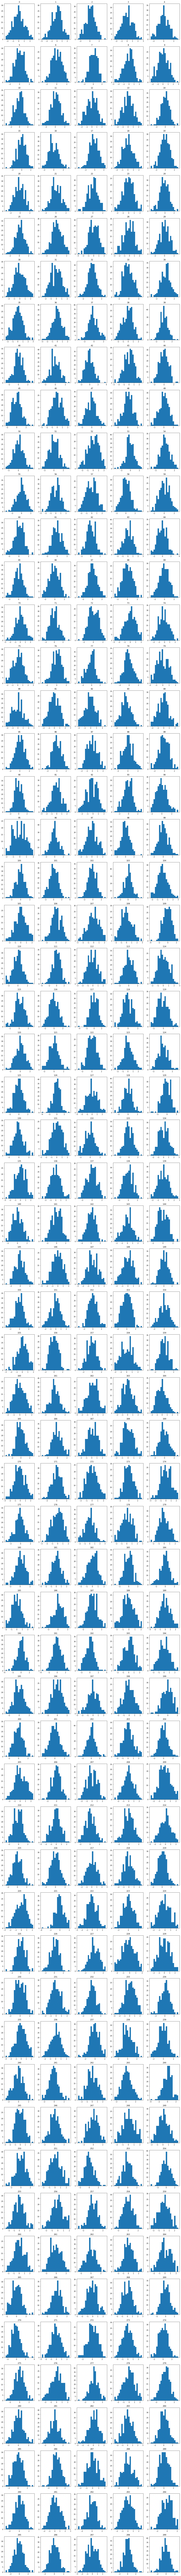

In [9]:
print('Frequency overviews')
plt.figure(figsize=(20,300))
for i, col in enumerate(f_cols):
    plt.subplot(60, 5, i + 1)
    plt.hist(train[col], 20) 
    plt.title(col)

Distribution overviews


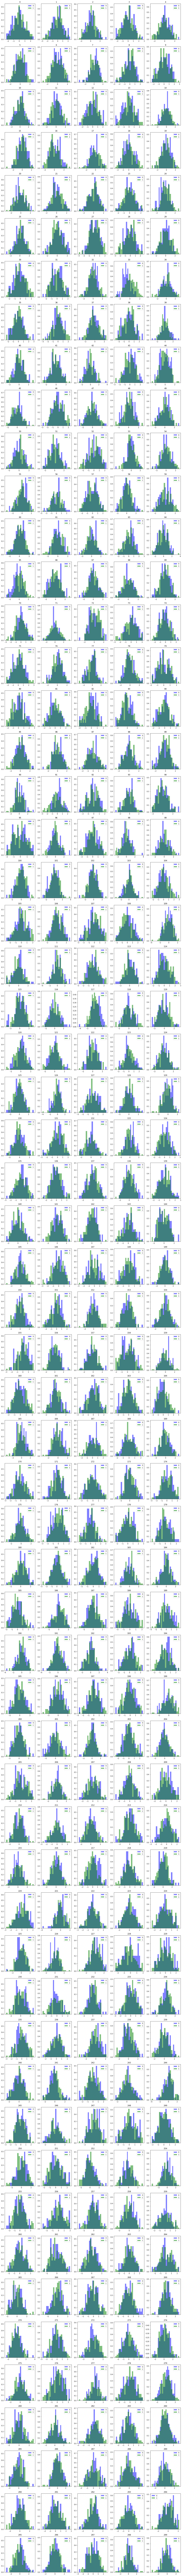

In [10]:
print('Distribution overviews')
plt.figure(figsize=(20,300))
for i, col in enumerate(f_cols):
    plt.subplot(60, 5, i + 1)
    plt.hist(train[train.target==0.0][col], 20, color="b", density=True, alpha=0.5, label="0") 
    plt.hist(train[train.target==1.0][col], 20, color="g", density=True, alpha=0.5, label="1")
    plt.legend()
    plt.title(col)

In [11]:
train = train.rename(columns={f"{i}":f"f{i}" for i in f_cols})

In [12]:
def plot_dists(train_long):

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
#     pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(train_long, row="Feature", hue="target", aspect=15, height=.5)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "values",
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=0.8, linewidth=1.5)
    g.map(sns.kdeplot, "values", clip_on=False, color="w", lw=2, bw_adjust=.5)

    # passing color=None to refline() uses the hue mapping
    # g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, "values")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.5)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    plt.show()

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


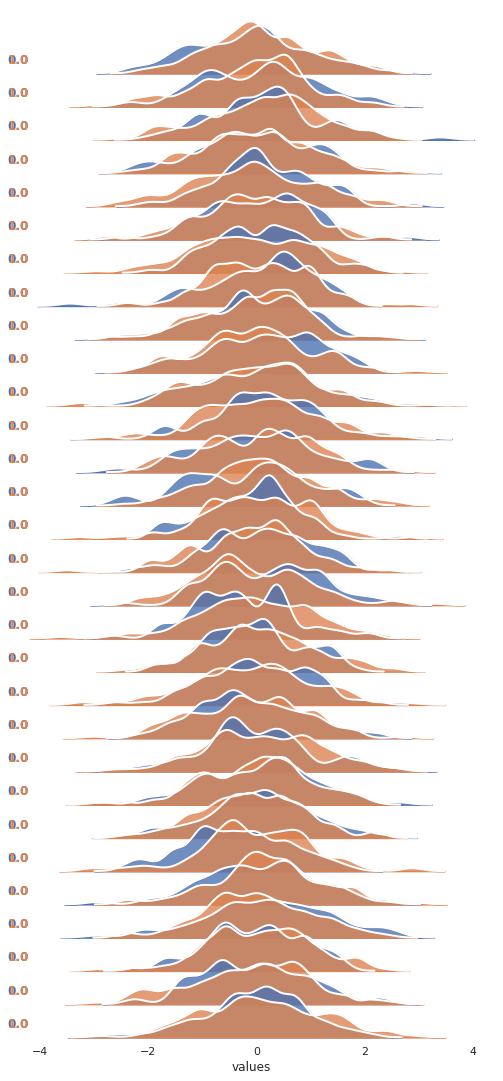

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


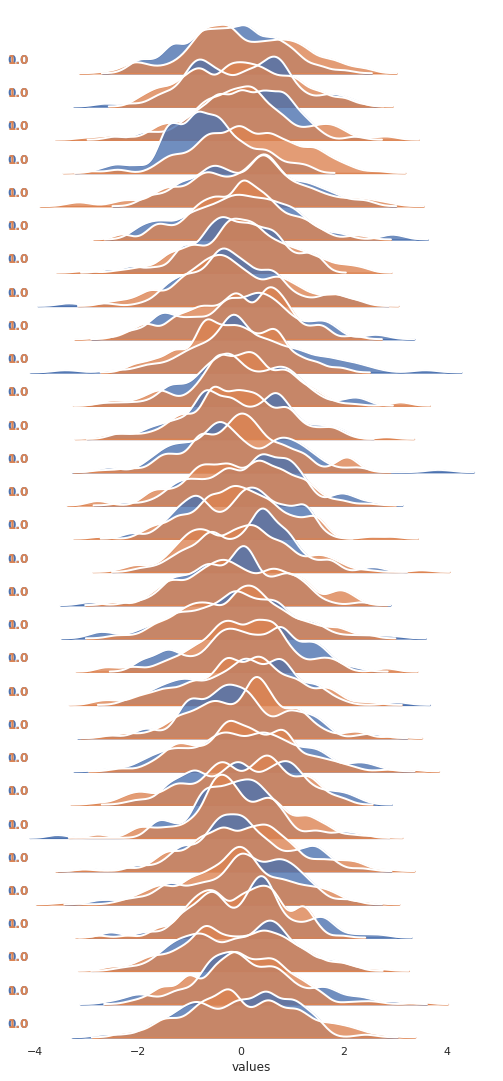

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


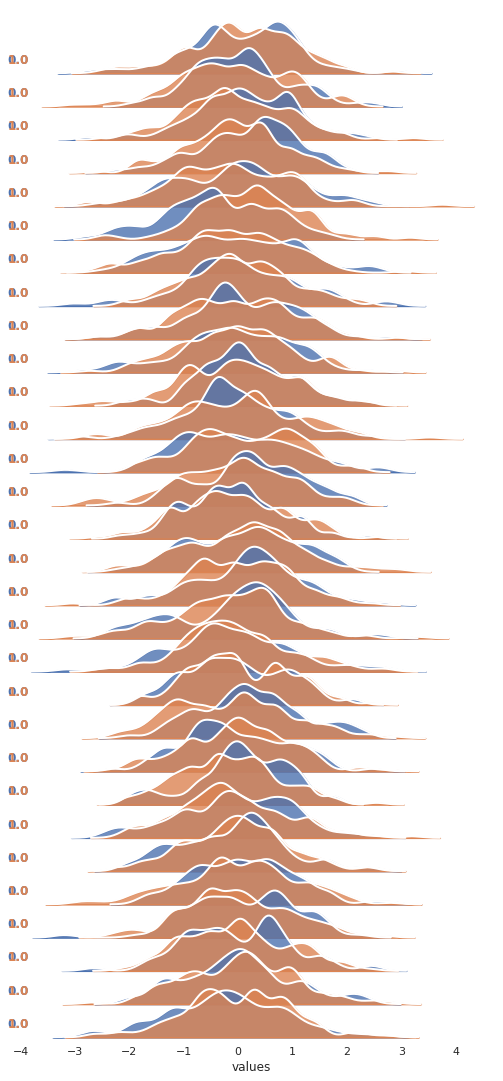

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


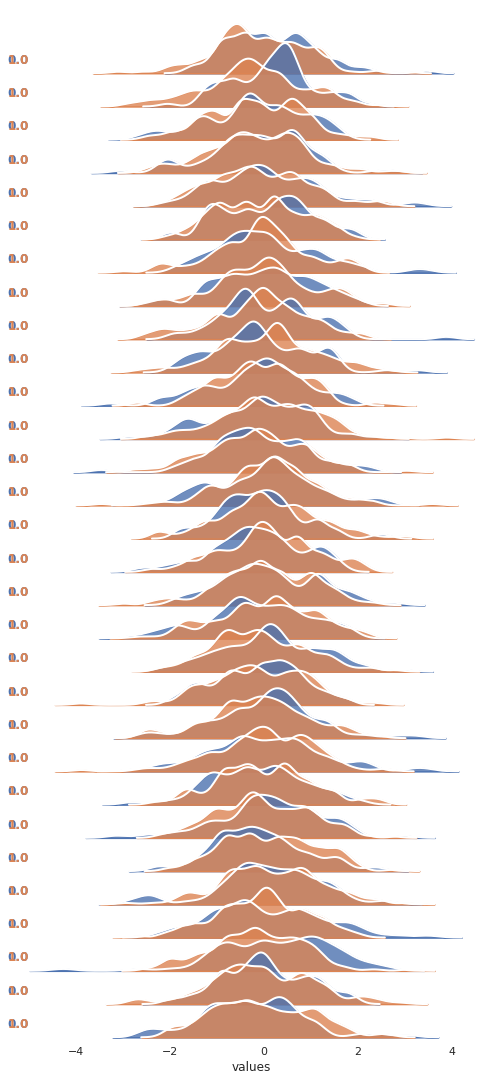

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


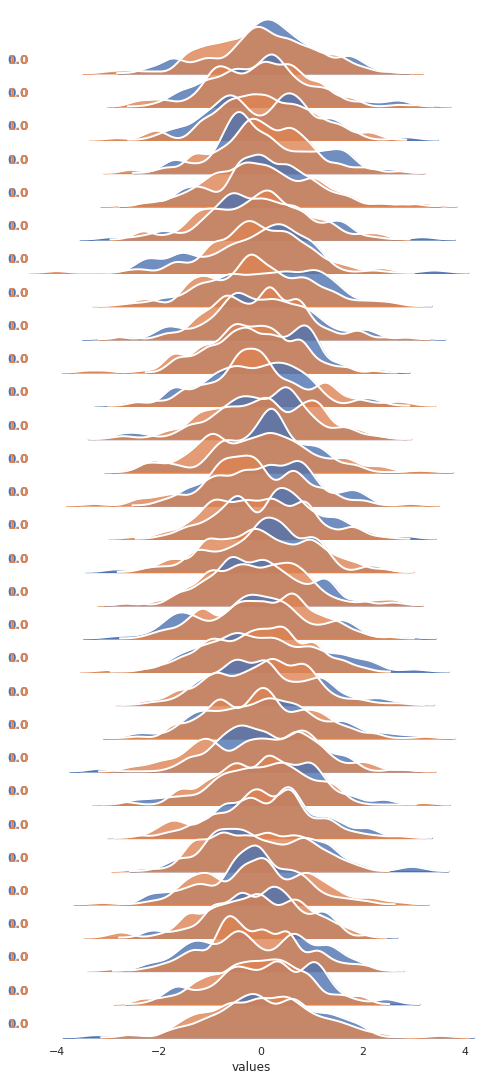

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


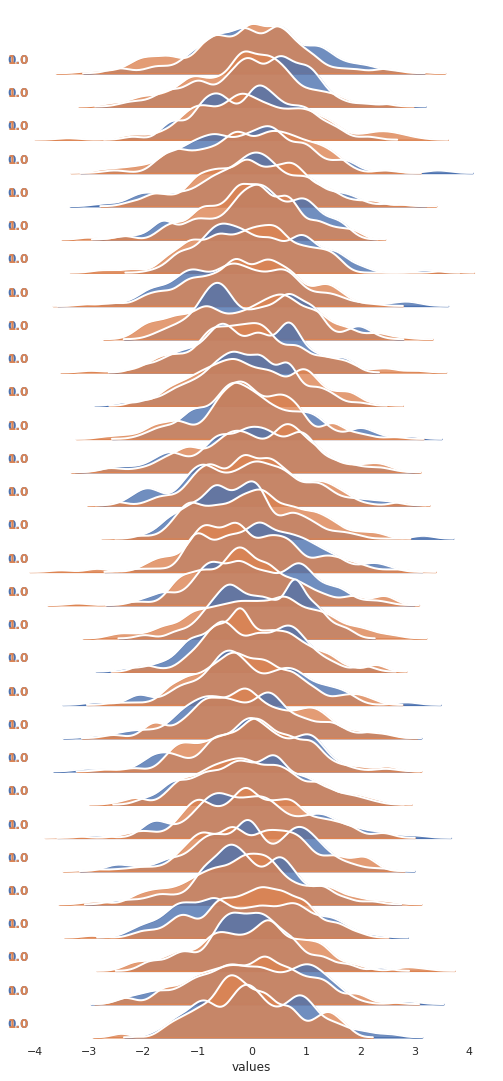

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


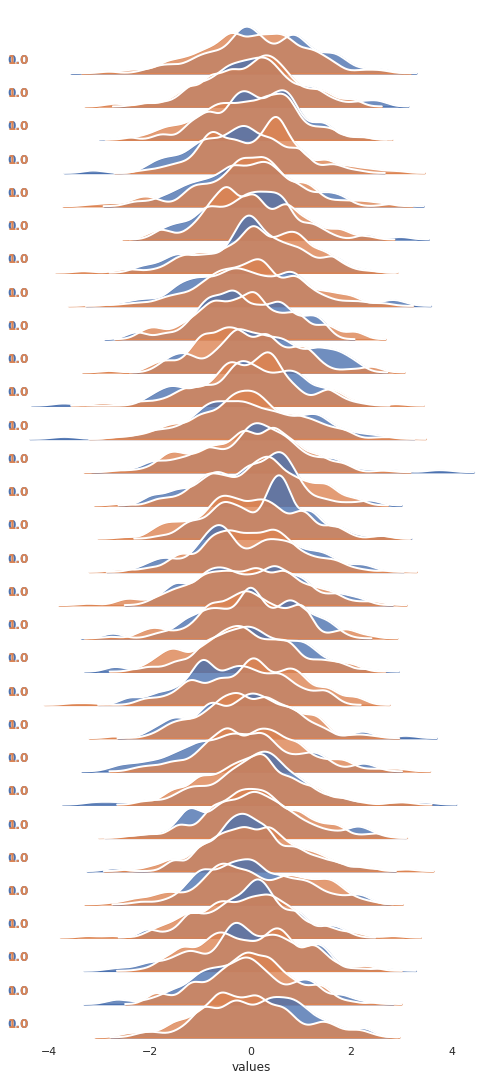

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


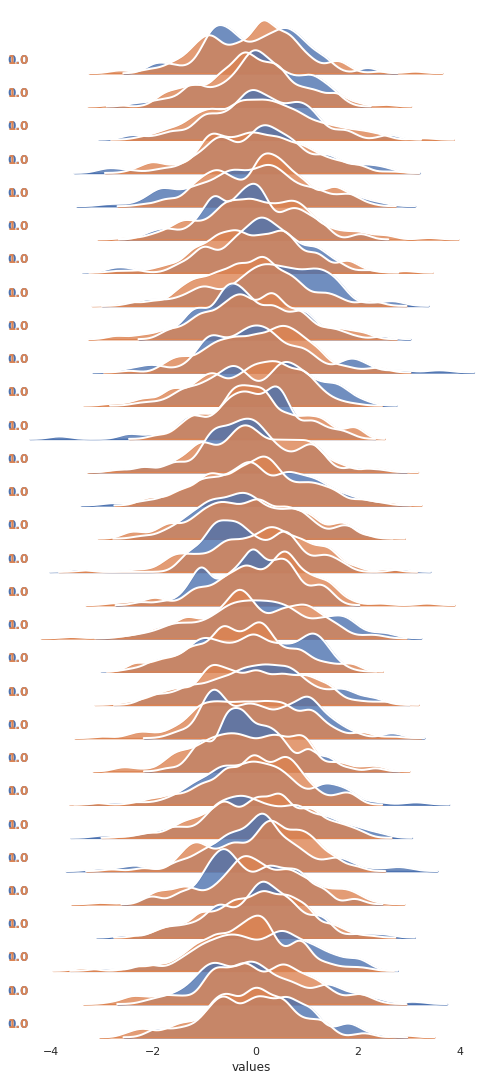

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


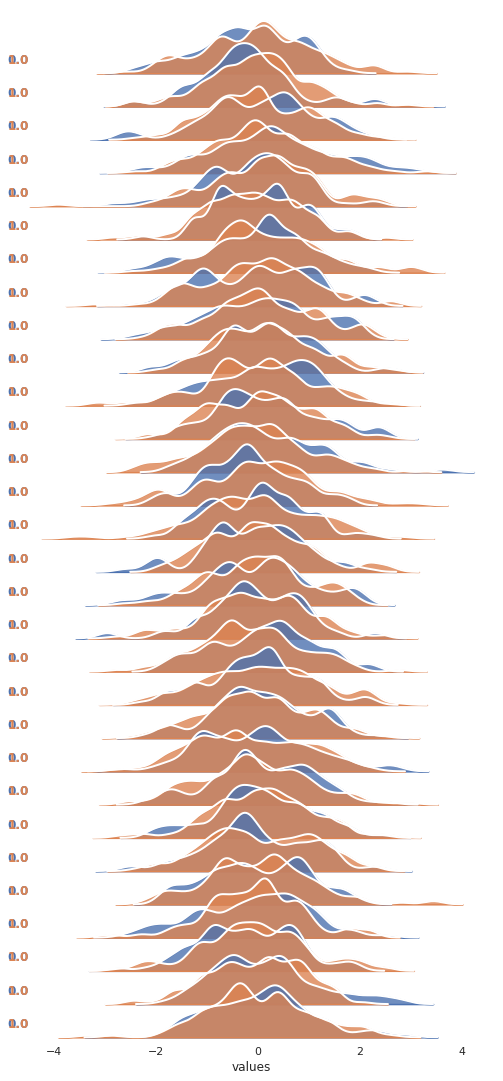

/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/torp/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


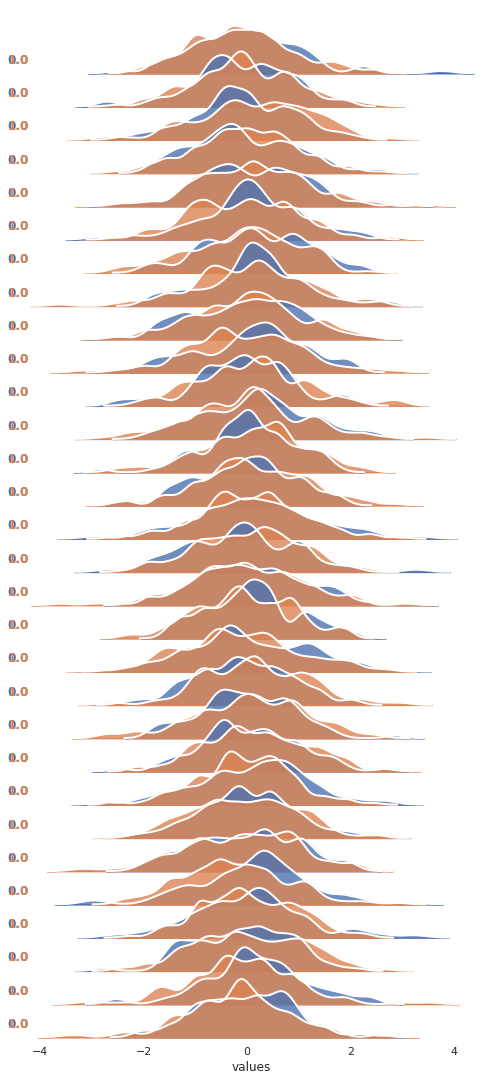

In [13]:
for idx in range(30,301,30):
    small_t = train[["id", "target"]+[f"f{i}" for i in f_cols[idx-30:idx]]]
    train_long = pd.wide_to_long(small_t, ["f"], i="id", j="Feature").reset_index().rename(columns={"f":"values"})
    plot_dists(train_long)

In [14]:
df = train.copy()

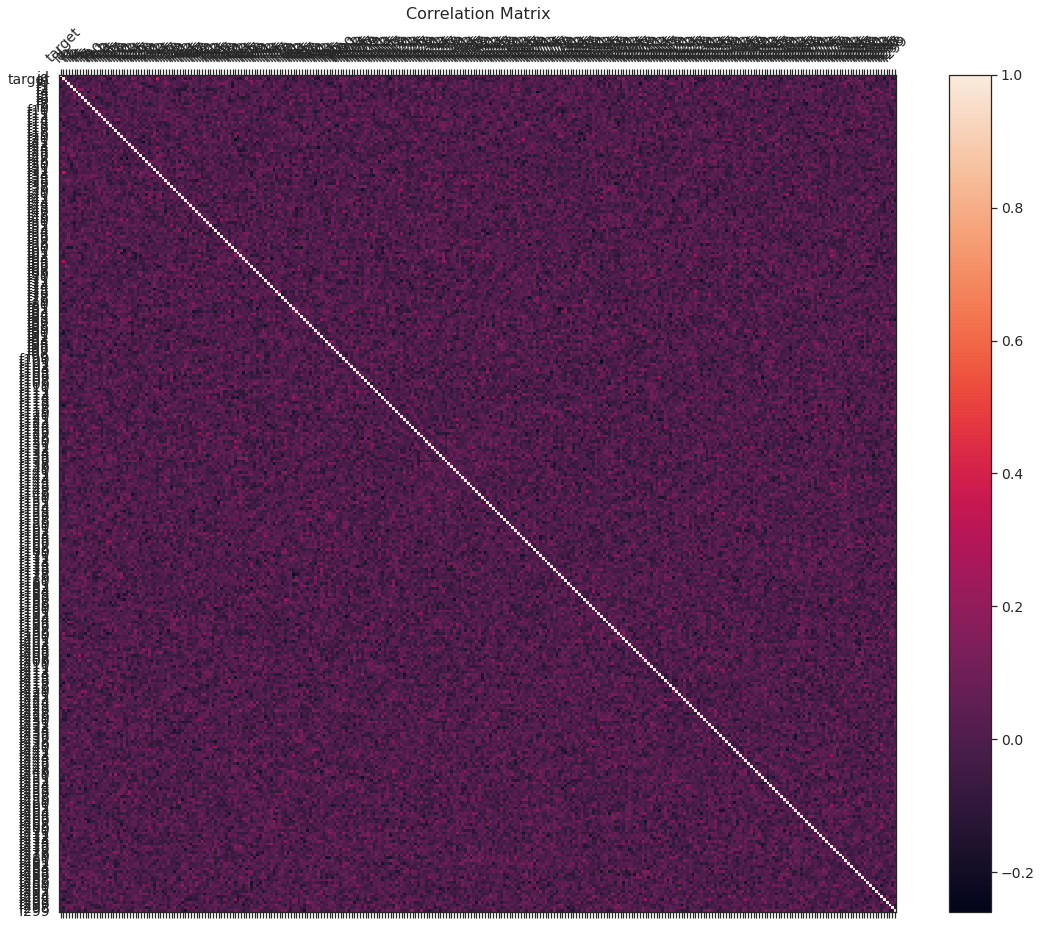

In [15]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

<AxesSubplot:>

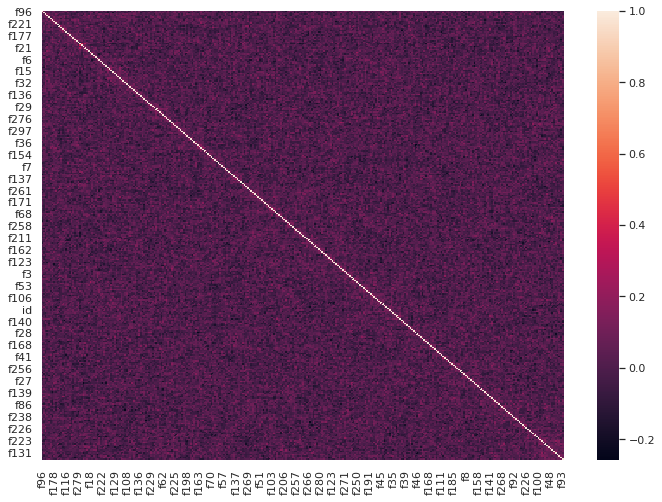

In [16]:
import scipy
import scipy.cluster.hierarchy as sch
sns.set(rc={'figure.figsize':(11.7,8.27)})

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]


sns.heatmap(cluster_corr(df.corr()))


<AxesSubplot:>

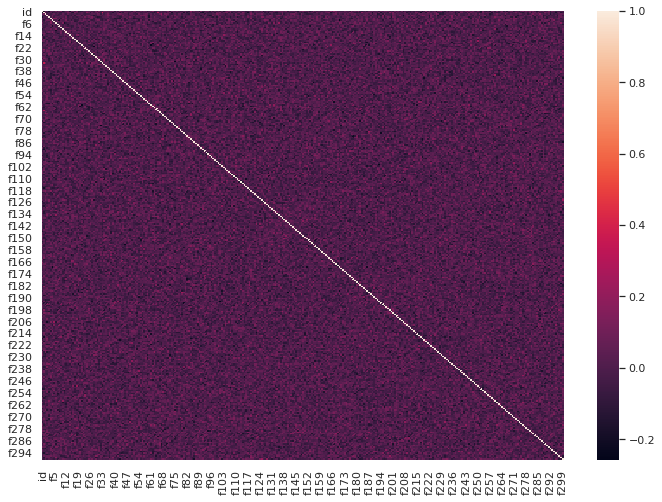

In [17]:
sns.heatmap(df.corr())